<a href="https://colab.research.google.com/github/amozher/airplane-passenger/blob/master/airpassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

** Import data**

In [2]:
uploaded= files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv


In [3]:

df = pd.read_csv('international-airline-passengers.csv', parse_dates=True,index_col=0)

df=df.sort_index(ascending=0)
# créer des colonnes pour t-1, t-2,t-3,t-4
df['Qt-1'] = df['Quantity'].shift(-1)
df['Qt-2'] = df['Quantity'].shift(-2)
df['Qt-3'] = df['Quantity'].shift(-3)
df['Qt-4'] = df['Quantity'].shift(-4)
df=df.dropna()

print(df.tail())

            Quantity   Qt-1   Qt-2   Qt-3   Qt-4
month                                           
1949-09-01       136  148.0  148.0  135.0  121.0
1949-08-01       148  148.0  135.0  121.0  129.0
1949-07-01       148  135.0  121.0  129.0  132.0
1949-06-01       135  121.0  129.0  132.0  118.0
1949-05-01       121  129.0  132.0  118.0  112.0


**Afficher graph **

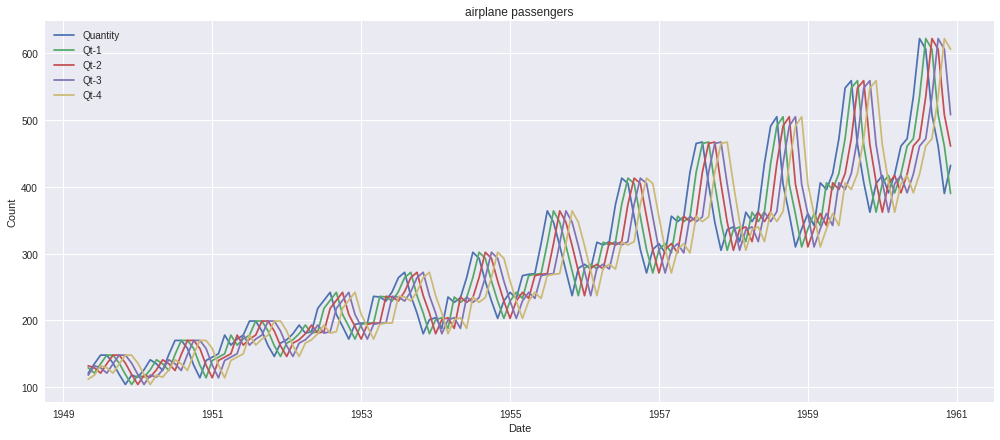

In [4]:
fig, ax = plt.subplots(figsize=(17,7))
df.plot(ax=ax)

#set ticks every week

ax.set_title('airplane passengers')
ax.set_ylabel('Count')
ax.set_xlabel('Date')
plt.show()

# **Créer le modele**

In [0]:
#Convertir les donées en arrays
Y = np.array(df['Quantity'])
X = np.array(df[['Qt-1','Qt-2','Qt-3','Qt-4']])

# create model
model = tf.keras.Sequential()
#créer une couche de 4 input comme entré qui sont qt-1 jusqu'a qt-4 et 12 sortie  avec une fonction d'activation sigmoid
model.add(layers.Dense(12, input_dim=4, activation='linear'))
#créer une couche de 6 sortie  avec une fonction d'activation sigmoid
#model.add(layers.Dense(6, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#créer une couche de 6 sortie  avec une fonction d'activation sigmoid
#model.add(layers.Dense(64, activation='sigmoid'))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(layers.Dense(6, activation='linear',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(layers.Dense(6, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(layers.Dense(6, activation='linear',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(layers.Dense(6, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(layers.Dense(6, activation='linear',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(layers.Dense(6, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#créer une couche de 1 sortie qui est Y ou bien Qt désiré avec une fonction d'activation linear
model.add(layers.Dense(1, activation='linear'))

# **Compiler**

In [6]:
# Compile model
#Ici J'ai utilisé MSE pour la fonction loss et optimization avec algorithm 'adam'
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer='adadelta', metrics=['accuracy'])
# Fit the model
#Ici je lui donne de faire 100 iteration
model.fit(X, Y, epochs=1000,batch_size=10)


Epoch 1/1000
140/140 [==============================] - 1s 9ms/step - loss: 7776.5313 - acc: 0.0000e+00
Epoch 2/1000
140/140 [==============================] - 0s 1ms/step - loss: 5378.4382 - acc: 0.0000e+00
Epoch 3/1000
140/140 [==============================] - 0s 1ms/step - loss: 4074.1299 - acc: 0.0000e+00
Epoch 4/1000
140/140 [==============================] - 0s 953us/step - loss: 3838.0780 - acc: 0.0000e+00
Epoch 5/1000
140/140 [==============================] - 0s 964us/step - loss: 3032.1718 - acc: 0.0000e+00
Epoch 6/1000
140/140 [==============================] - 0s 977us/step - loss: 2847.3564 - acc: 0.0000e+00
Epoch 7/1000
140/140 [==============================] - 0s 978us/step - loss: 2610.1097 - acc: 0.0000e+00
Epoch 8/1000
140/140 [==============================] - 0s 1ms/step - loss: 2461.3082 - acc: 0.0000e+00
Epoch 9/1000
140/140 [==============================] - 0s 992us/step - loss: 2469.6502 - acc: 0.0000e+00
Epoch 10/1000
140/140 [==============================]

# **Evaluer le modèle**

In [7]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

140/140 [==============================] - 0s 780us/step

acc: 0.00%


# **Calculer la prédiction**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


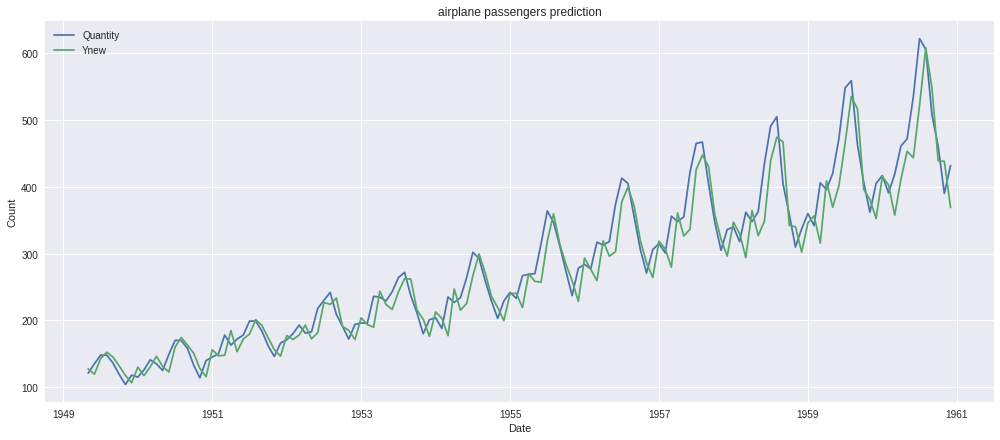

In [8]:
Ynew = model.predict(X)
df['Ynew']=Ynew

#afficher la prédiction
fig1, ax1 = plt.subplots(figsize=(17,7))
df.plot(ax=ax1,x=df.index, y=["Quantity", "Ynew"])
ax1.set_title('airplane passengers prediction')
ax1.set_ylabel('Count')
ax1.set_xlabel('Date')

plt.show()